### imported packages

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, make_scorer, accuracy_score, precision_score, average_precision_score, \
classification_report, recall_score, confusion_matrix, f1_score

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


## Question 4

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(10)

data = pd.read_csv('Data/question4.csv')
data.dropna(inplace=True)
data.head()

,driverId,constructorId,circuitId,Did not finish,Podium,Pos 4 to 10,Accident / Collision,SC,Dry,Wet,pitStop timing (avg),pitStop timing prop(driver),grid,driver_error_rate,constructor_error_rate,circuit_error_rate,race_class
0,1,131,1,0.33,0.33,0.33,0.0,0.67,1.0,0.0,14691.00000,0.073046,1,0.009615,0.073718,0.126246,1
1,1,131,3,0.00,0.67,0.33,0.0,0.33,1.0,0.0,23758.00000,0.073046,1,0.009615,0.073718,0.028571,1
2,1,131,17,0.00,1.00,0.00,0.0,0.33,1.0,0.0,21944.66667,0.073046,22,0.009615,0.073718,0.046358,2
3,1,131,71,0.00,1.00,0.00,0.0,0.50,1.0,0.0,0.00000,0.073046,10,0.009615,0.073718,0.108434,1
4,1,131,4,0.00,0.67,0.00,0.0,0.00,1.0,0.0,21670.66667,0.073046,1,0.009615,0.073718,0.069536,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 17 columns):
driverId                       506 non-null int64
constructorId                  506 non-null int64
circuitId                      506 non-null int64
Did not finish                 506 non-null float64
Podium                         506 non-null float64
Pos 4 to 10                    506 non-null float64
Accident / Collision           506 non-null float64
SC                             506 non-null float64
Dry                            506 non-null float64
Wet                            506 non-null float64
pitStop timing (avg)           506 non-null float64
pitStop timing prop(driver)    506 non-null float64
grid                           506 non-null int64
driver_error_rate              506 non-null float64
constructor_error_rate         506 non-null float64
circuit_error_rate             506 non-null float64
race_class                     506 non-null int64
dtypes: float64(12), 

In [5]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1:]

In [6]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns, index=X.index)
X.head()

,driverId,constructorId,circuitId,Did not finish,Podium,Pos 4 to 10,Accident / Collision,SC,Dry,Wet,pitStop timing (avg),pitStop timing prop(driver),grid,driver_error_rate,constructor_error_rate,circuit_error_rate
0,0.0,0.62201,0.000000,0.33,0.33,0.33,0.0,0.67,1.0,0.0,0.500255,1.0,0.045455,0.060666,0.013323,0.749211
1,0.0,0.62201,0.027778,0.00,0.67,0.33,0.0,0.33,1.0,0.0,0.809003,1.0,0.045455,0.060666,0.013323,0.034828
2,0.0,0.62201,0.222222,0.00,1.00,0.00,0.0,0.33,1.0,0.0,0.747256,1.0,1.000000,0.060666,0.013323,0.164915
3,0.0,0.62201,0.972222,0.00,1.00,0.00,0.0,0.50,1.0,0.0,0.000000,1.0,0.454545,0.060666,0.013323,0.618935
4,0.0,0.62201,0.041667,0.00,0.67,0.00,0.0,0.00,1.0,0.0,0.737926,1.0,0.045455,0.060666,0.013323,0.334443


In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
print(X_new.shape)
sec = SelectKBest(chi2, k=10).fit(X, y)
selected = sec.get_support()
print("Selected features: ")
features = ['driverId','constructorId','circuitId','Did not finish','Podium','Pos 4 to 10','Accident / Collision','SC','Dry','Wet','pitStop timing (avg)','pitStop timing prop(driver)','start_grid','driver_error_rate','constructor_error_rate','circuit_error_rate']
for i in range(0,len(selected)):
  if(selected[i]==True):
    print(features[i])

(506, 10)
Selected features: 
driverId
constructorId
Podium
Pos 4 to 10
Wet
pitStop timing (avg)
pitStop timing prop(driver)
start_grid
driver_error_rate
constructor_error_rate


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X_test_inverse = min_max_scaler.inverse_transform(X_test)

In [10]:
drivers = []
constructors = []

for i in X_test_inverse:
  drivers.append(i[0])
  constructors.append(i[1])

In [11]:
drivers = np.round(drivers, 0)
constructors = np.round(constructors, 0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [13]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback

histories = {}

np.random.seed(10)
tf.random.set_seed(10)

# create the model
l2 = tf.keras.regularizers.l2(l2=1e-6)

model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2),
    Dropout(rate=0.2),
    Dense(32, activation='relu', kernel_regularizer=l2),
    Dropout(rate=0.2),
    Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay = 1e-6)

model.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = 'models/qn4.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# train the model
histories['qn1'] =model.fit(X_train, y_train,
                            epochs=1000,
                            verbose = 2,
                            batch_size=4,
                            callbacks = [model_checkpoint_callback],
                            validation_data=(X_test, y_test))

Epoch 1/1000
101/101 - 0s - loss: 1.3882 - accuracy: 0.2550 - val_loss: 1.3725 - val_accuracy: 0.3039
Epoch 2/1000
101/101 - 0s - loss: 1.3787 - accuracy: 0.2426 - val_loss: 1.3691 - val_accuracy: 0.3039
Epoch 3/1000
101/101 - 0s - loss: 1.3836 - accuracy: 0.2475 - val_loss: 1.3661 - val_accuracy: 0.3039
Epoch 4/1000
101/101 - 0s - loss: 1.3859 - accuracy: 0.2574 - val_loss: 1.3630 - val_accuracy: 0.3137
Epoch 5/1000
101/101 - 0s - loss: 1.3573 - accuracy: 0.2822 - val_loss: 1.3603 - val_accuracy: 0.3235
Epoch 6/1000
101/101 - 0s - loss: 1.3554 - accuracy: 0.3218 - val_loss: 1.3578 - val_accuracy: 0.3235
Epoch 7/1000
101/101 - 0s - loss: 1.3706 - accuracy: 0.2698 - val_loss: 1.3555 - val_accuracy: 0.3431
Epoch 8/1000
101/101 - 0s - loss: 1.3570 - accuracy: 0.2995 - val_loss: 1.3533 - val_accuracy: 0.3431
Epoch 9/1000
101/101 - 0s - loss: 1.3488 - accuracy: 0.3490 - val_loss: 1.3511 - val_accuracy: 0.3627
Epoch 10/1000
101/101 - 0s - loss: 1.3469 - accuracy: 0.3614 - val_loss: 1.3491 - 

Epoch 81/1000
101/101 - 0s - loss: 1.1379 - accuracy: 0.5421 - val_loss: 1.1783 - val_accuracy: 0.4804
Epoch 82/1000
101/101 - 0s - loss: 1.1347 - accuracy: 0.5371 - val_loss: 1.1756 - val_accuracy: 0.4706
Epoch 83/1000
101/101 - 0s - loss: 1.1466 - accuracy: 0.5074 - val_loss: 1.1737 - val_accuracy: 0.4706
Epoch 84/1000
101/101 - 0s - loss: 1.1464 - accuracy: 0.5149 - val_loss: 1.1719 - val_accuracy: 0.4706
Epoch 85/1000
101/101 - 0s - loss: 1.1172 - accuracy: 0.5322 - val_loss: 1.1696 - val_accuracy: 0.4706
Epoch 86/1000
101/101 - 0s - loss: 1.1137 - accuracy: 0.5371 - val_loss: 1.1671 - val_accuracy: 0.4706
Epoch 87/1000
101/101 - 0s - loss: 1.1140 - accuracy: 0.5050 - val_loss: 1.1640 - val_accuracy: 0.4706
Epoch 88/1000
101/101 - 0s - loss: 1.1088 - accuracy: 0.5396 - val_loss: 1.1617 - val_accuracy: 0.4804
Epoch 89/1000
101/101 - 0s - loss: 1.1178 - accuracy: 0.5272 - val_loss: 1.1595 - val_accuracy: 0.4902
Epoch 90/1000
101/101 - 0s - loss: 1.1058 - accuracy: 0.5396 - val_loss: 

Epoch 160/1000
101/101 - 0s - loss: 1.0148 - accuracy: 0.5520 - val_loss: 1.0829 - val_accuracy: 0.5000
Epoch 161/1000
101/101 - 0s - loss: 1.0016 - accuracy: 0.5644 - val_loss: 1.0818 - val_accuracy: 0.5000
Epoch 162/1000
101/101 - 0s - loss: 0.9829 - accuracy: 0.5792 - val_loss: 1.0812 - val_accuracy: 0.5000
Epoch 163/1000
101/101 - 0s - loss: 1.0313 - accuracy: 0.5718 - val_loss: 1.0822 - val_accuracy: 0.5000
Epoch 164/1000
101/101 - 0s - loss: 1.0330 - accuracy: 0.5668 - val_loss: 1.0824 - val_accuracy: 0.5000
Epoch 165/1000
101/101 - 0s - loss: 1.0296 - accuracy: 0.5668 - val_loss: 1.0820 - val_accuracy: 0.5000
Epoch 166/1000
101/101 - 0s - loss: 1.0136 - accuracy: 0.5693 - val_loss: 1.0804 - val_accuracy: 0.5000
Epoch 167/1000
101/101 - 0s - loss: 1.0258 - accuracy: 0.5594 - val_loss: 1.0805 - val_accuracy: 0.5000
Epoch 168/1000
101/101 - 0s - loss: 1.0004 - accuracy: 0.5767 - val_loss: 1.0809 - val_accuracy: 0.5000
Epoch 169/1000
101/101 - 0s - loss: 1.0157 - accuracy: 0.5891 - 

Epoch 239/1000
101/101 - 0s - loss: 0.9756 - accuracy: 0.5644 - val_loss: 1.0695 - val_accuracy: 0.5098
Epoch 240/1000
101/101 - 0s - loss: 0.9998 - accuracy: 0.5792 - val_loss: 1.0689 - val_accuracy: 0.5098
Epoch 241/1000
101/101 - 0s - loss: 0.9734 - accuracy: 0.5842 - val_loss: 1.0679 - val_accuracy: 0.5098
Epoch 242/1000
101/101 - 0s - loss: 0.9671 - accuracy: 0.5817 - val_loss: 1.0675 - val_accuracy: 0.5098
Epoch 243/1000
101/101 - 0s - loss: 0.9727 - accuracy: 0.5866 - val_loss: 1.0684 - val_accuracy: 0.5098
Epoch 244/1000
101/101 - 0s - loss: 0.9559 - accuracy: 0.5866 - val_loss: 1.0678 - val_accuracy: 0.5098
Epoch 245/1000
101/101 - 0s - loss: 0.9773 - accuracy: 0.5594 - val_loss: 1.0679 - val_accuracy: 0.5098
Epoch 246/1000
101/101 - 0s - loss: 0.9984 - accuracy: 0.5520 - val_loss: 1.0691 - val_accuracy: 0.5098
Epoch 247/1000
101/101 - 0s - loss: 0.9740 - accuracy: 0.5866 - val_loss: 1.0700 - val_accuracy: 0.5098
Epoch 248/1000
101/101 - 0s - loss: 0.9812 - accuracy: 0.5668 - 

Epoch 318/1000
101/101 - 0s - loss: 0.9769 - accuracy: 0.5767 - val_loss: 1.0638 - val_accuracy: 0.5098
Epoch 319/1000
101/101 - 0s - loss: 0.9584 - accuracy: 0.5941 - val_loss: 1.0645 - val_accuracy: 0.5098
Epoch 320/1000
101/101 - 0s - loss: 0.9713 - accuracy: 0.5891 - val_loss: 1.0648 - val_accuracy: 0.5098
Epoch 321/1000
101/101 - 0s - loss: 0.9852 - accuracy: 0.5594 - val_loss: 1.0632 - val_accuracy: 0.5098
Epoch 322/1000
101/101 - 0s - loss: 0.9390 - accuracy: 0.6089 - val_loss: 1.0621 - val_accuracy: 0.5098
Epoch 323/1000
101/101 - 0s - loss: 0.9728 - accuracy: 0.5866 - val_loss: 1.0642 - val_accuracy: 0.5098
Epoch 324/1000
101/101 - 0s - loss: 0.9626 - accuracy: 0.5941 - val_loss: 1.0645 - val_accuracy: 0.5098
Epoch 325/1000
101/101 - 0s - loss: 0.9368 - accuracy: 0.6114 - val_loss: 1.0654 - val_accuracy: 0.5098
Epoch 326/1000
101/101 - 0s - loss: 0.9674 - accuracy: 0.5792 - val_loss: 1.0669 - val_accuracy: 0.5098
Epoch 327/1000
101/101 - 0s - loss: 0.9633 - accuracy: 0.5916 - 

Epoch 397/1000
101/101 - 0s - loss: 0.9360 - accuracy: 0.5965 - val_loss: 1.0643 - val_accuracy: 0.5098
Epoch 398/1000
101/101 - 0s - loss: 0.9447 - accuracy: 0.5842 - val_loss: 1.0643 - val_accuracy: 0.5098
Epoch 399/1000
101/101 - 0s - loss: 0.9442 - accuracy: 0.6114 - val_loss: 1.0633 - val_accuracy: 0.5098
Epoch 400/1000
101/101 - 0s - loss: 0.9472 - accuracy: 0.6015 - val_loss: 1.0630 - val_accuracy: 0.5196
Epoch 401/1000
101/101 - 0s - loss: 0.9574 - accuracy: 0.5842 - val_loss: 1.0634 - val_accuracy: 0.5098
Epoch 402/1000
101/101 - 0s - loss: 0.9520 - accuracy: 0.6040 - val_loss: 1.0646 - val_accuracy: 0.5098
Epoch 403/1000
101/101 - 0s - loss: 0.9477 - accuracy: 0.5941 - val_loss: 1.0649 - val_accuracy: 0.5098
Epoch 404/1000
101/101 - 0s - loss: 0.9415 - accuracy: 0.6015 - val_loss: 1.0648 - val_accuracy: 0.5098
Epoch 405/1000
101/101 - 0s - loss: 0.9606 - accuracy: 0.5792 - val_loss: 1.0651 - val_accuracy: 0.5098
Epoch 406/1000
101/101 - 0s - loss: 0.9636 - accuracy: 0.5916 - 

Epoch 476/1000
101/101 - 0s - loss: 0.9529 - accuracy: 0.5891 - val_loss: 1.0681 - val_accuracy: 0.5294
Epoch 477/1000
101/101 - 0s - loss: 0.9497 - accuracy: 0.5990 - val_loss: 1.0686 - val_accuracy: 0.5294
Epoch 478/1000
101/101 - 0s - loss: 0.9355 - accuracy: 0.5817 - val_loss: 1.0682 - val_accuracy: 0.5294
Epoch 479/1000
101/101 - 0s - loss: 0.9382 - accuracy: 0.6015 - val_loss: 1.0693 - val_accuracy: 0.5196
Epoch 480/1000
101/101 - 0s - loss: 0.9275 - accuracy: 0.6089 - val_loss: 1.0677 - val_accuracy: 0.5294
Epoch 481/1000
101/101 - 0s - loss: 0.9381 - accuracy: 0.5891 - val_loss: 1.0684 - val_accuracy: 0.5294
Epoch 482/1000
101/101 - 0s - loss: 0.9350 - accuracy: 0.5990 - val_loss: 1.0678 - val_accuracy: 0.5294
Epoch 483/1000
101/101 - 0s - loss: 0.9251 - accuracy: 0.5990 - val_loss: 1.0668 - val_accuracy: 0.5294
Epoch 484/1000
101/101 - 0s - loss: 0.9138 - accuracy: 0.6163 - val_loss: 1.0678 - val_accuracy: 0.5294
Epoch 485/1000
101/101 - 0s - loss: 0.9202 - accuracy: 0.6064 - 

Epoch 555/1000
101/101 - 0s - loss: 0.9111 - accuracy: 0.6064 - val_loss: 1.0724 - val_accuracy: 0.5294
Epoch 556/1000
101/101 - 0s - loss: 0.8894 - accuracy: 0.6139 - val_loss: 1.0725 - val_accuracy: 0.5294
Epoch 557/1000
101/101 - 0s - loss: 0.9289 - accuracy: 0.5866 - val_loss: 1.0732 - val_accuracy: 0.5294
Epoch 558/1000
101/101 - 0s - loss: 0.9216 - accuracy: 0.6213 - val_loss: 1.0744 - val_accuracy: 0.5294
Epoch 559/1000
101/101 - 0s - loss: 0.9135 - accuracy: 0.6089 - val_loss: 1.0738 - val_accuracy: 0.5294
Epoch 560/1000
101/101 - 0s - loss: 0.9048 - accuracy: 0.6040 - val_loss: 1.0738 - val_accuracy: 0.5294
Epoch 561/1000
101/101 - 0s - loss: 0.9295 - accuracy: 0.6040 - val_loss: 1.0726 - val_accuracy: 0.5294
Epoch 562/1000
101/101 - 0s - loss: 0.8986 - accuracy: 0.5668 - val_loss: 1.0721 - val_accuracy: 0.5294
Epoch 563/1000
101/101 - 0s - loss: 0.9202 - accuracy: 0.6089 - val_loss: 1.0724 - val_accuracy: 0.5294
Epoch 564/1000
101/101 - 0s - loss: 0.9212 - accuracy: 0.6188 - 

Epoch 634/1000
101/101 - 0s - loss: 0.8988 - accuracy: 0.6213 - val_loss: 1.0775 - val_accuracy: 0.5294
Epoch 635/1000
101/101 - 0s - loss: 0.9114 - accuracy: 0.6089 - val_loss: 1.0769 - val_accuracy: 0.5294
Epoch 636/1000
101/101 - 0s - loss: 0.8934 - accuracy: 0.6139 - val_loss: 1.0752 - val_accuracy: 0.5294
Epoch 637/1000
101/101 - 0s - loss: 0.9040 - accuracy: 0.6015 - val_loss: 1.0753 - val_accuracy: 0.5294
Epoch 638/1000
101/101 - 0s - loss: 0.9072 - accuracy: 0.5941 - val_loss: 1.0752 - val_accuracy: 0.5294
Epoch 639/1000
101/101 - 0s - loss: 0.9223 - accuracy: 0.6238 - val_loss: 1.0761 - val_accuracy: 0.5294
Epoch 640/1000
101/101 - 0s - loss: 0.8902 - accuracy: 0.6163 - val_loss: 1.0766 - val_accuracy: 0.5294
Epoch 641/1000
101/101 - 0s - loss: 0.9109 - accuracy: 0.5866 - val_loss: 1.0763 - val_accuracy: 0.5294
Epoch 642/1000
101/101 - 0s - loss: 0.9057 - accuracy: 0.6287 - val_loss: 1.0757 - val_accuracy: 0.5294
Epoch 643/1000
101/101 - 0s - loss: 0.9262 - accuracy: 0.6089 - 

Epoch 713/1000
101/101 - 0s - loss: 0.8855 - accuracy: 0.6361 - val_loss: 1.0807 - val_accuracy: 0.5294
Epoch 714/1000
101/101 - 0s - loss: 0.9038 - accuracy: 0.6262 - val_loss: 1.0814 - val_accuracy: 0.5294
Epoch 715/1000
101/101 - 0s - loss: 0.9107 - accuracy: 0.6114 - val_loss: 1.0815 - val_accuracy: 0.5294
Epoch 716/1000
101/101 - 0s - loss: 0.9076 - accuracy: 0.6139 - val_loss: 1.0833 - val_accuracy: 0.5294
Epoch 717/1000
101/101 - 0s - loss: 0.8915 - accuracy: 0.6064 - val_loss: 1.0837 - val_accuracy: 0.5294
Epoch 718/1000
101/101 - 0s - loss: 0.8895 - accuracy: 0.6213 - val_loss: 1.0841 - val_accuracy: 0.5294
Epoch 719/1000
101/101 - 0s - loss: 0.9197 - accuracy: 0.5990 - val_loss: 1.0833 - val_accuracy: 0.5294
Epoch 720/1000
101/101 - 0s - loss: 0.9166 - accuracy: 0.6040 - val_loss: 1.0833 - val_accuracy: 0.5294
Epoch 721/1000
101/101 - 0s - loss: 0.8868 - accuracy: 0.5965 - val_loss: 1.0833 - val_accuracy: 0.5294
Epoch 722/1000
101/101 - 0s - loss: 0.8870 - accuracy: 0.6337 - 

Epoch 792/1000
101/101 - 0s - loss: 0.8857 - accuracy: 0.6015 - val_loss: 1.0852 - val_accuracy: 0.5392
Epoch 793/1000
101/101 - 0s - loss: 0.8712 - accuracy: 0.6114 - val_loss: 1.0858 - val_accuracy: 0.5392
Epoch 794/1000
101/101 - 0s - loss: 0.9067 - accuracy: 0.6188 - val_loss: 1.0858 - val_accuracy: 0.5392
Epoch 795/1000
101/101 - 0s - loss: 0.8846 - accuracy: 0.6040 - val_loss: 1.0865 - val_accuracy: 0.5392
Epoch 796/1000
101/101 - 0s - loss: 0.8754 - accuracy: 0.6386 - val_loss: 1.0864 - val_accuracy: 0.5392
Epoch 797/1000
101/101 - 0s - loss: 0.8868 - accuracy: 0.6163 - val_loss: 1.0864 - val_accuracy: 0.5392
Epoch 798/1000
101/101 - 0s - loss: 0.9156 - accuracy: 0.5965 - val_loss: 1.0868 - val_accuracy: 0.5392
Epoch 799/1000
101/101 - 0s - loss: 0.9160 - accuracy: 0.6163 - val_loss: 1.0855 - val_accuracy: 0.5392
Epoch 800/1000
101/101 - 0s - loss: 0.8861 - accuracy: 0.6089 - val_loss: 1.0855 - val_accuracy: 0.5392
Epoch 801/1000
101/101 - 0s - loss: 0.9111 - accuracy: 0.5866 - 

Epoch 871/1000
101/101 - 0s - loss: 0.8686 - accuracy: 0.6361 - val_loss: 1.0893 - val_accuracy: 0.5392
Epoch 872/1000
101/101 - 0s - loss: 0.8902 - accuracy: 0.6064 - val_loss: 1.0889 - val_accuracy: 0.5392
Epoch 873/1000
101/101 - 0s - loss: 0.8816 - accuracy: 0.6188 - val_loss: 1.0887 - val_accuracy: 0.5392
Epoch 874/1000
101/101 - 0s - loss: 0.8781 - accuracy: 0.6089 - val_loss: 1.0909 - val_accuracy: 0.5392
Epoch 875/1000
101/101 - 0s - loss: 0.8723 - accuracy: 0.6312 - val_loss: 1.0911 - val_accuracy: 0.5392
Epoch 876/1000
101/101 - 0s - loss: 0.8890 - accuracy: 0.6188 - val_loss: 1.0921 - val_accuracy: 0.5392
Epoch 877/1000
101/101 - 0s - loss: 0.8661 - accuracy: 0.6163 - val_loss: 1.0934 - val_accuracy: 0.5392
Epoch 878/1000
101/101 - 0s - loss: 0.8771 - accuracy: 0.6411 - val_loss: 1.0912 - val_accuracy: 0.5392
Epoch 879/1000
101/101 - 0s - loss: 0.8636 - accuracy: 0.6163 - val_loss: 1.0914 - val_accuracy: 0.5392
Epoch 880/1000
101/101 - 0s - loss: 0.8944 - accuracy: 0.6213 - 

Epoch 950/1000
101/101 - 0s - loss: 0.8882 - accuracy: 0.6064 - val_loss: 1.0930 - val_accuracy: 0.5392
Epoch 951/1000
101/101 - 0s - loss: 0.8865 - accuracy: 0.6188 - val_loss: 1.0918 - val_accuracy: 0.5392
Epoch 952/1000
101/101 - 0s - loss: 0.8783 - accuracy: 0.6262 - val_loss: 1.0932 - val_accuracy: 0.5392
Epoch 953/1000
101/101 - 0s - loss: 0.8711 - accuracy: 0.6485 - val_loss: 1.0940 - val_accuracy: 0.5392
Epoch 954/1000
101/101 - 0s - loss: 0.8809 - accuracy: 0.6287 - val_loss: 1.0957 - val_accuracy: 0.5392
Epoch 955/1000
101/101 - 0s - loss: 0.8891 - accuracy: 0.6114 - val_loss: 1.0965 - val_accuracy: 0.5392
Epoch 956/1000
101/101 - 0s - loss: 0.8807 - accuracy: 0.6262 - val_loss: 1.0968 - val_accuracy: 0.5392
Epoch 957/1000
101/101 - 0s - loss: 0.8705 - accuracy: 0.6436 - val_loss: 1.0957 - val_accuracy: 0.5392
Epoch 958/1000
101/101 - 0s - loss: 0.8727 - accuracy: 0.6163 - val_loss: 1.0959 - val_accuracy: 0.5392
Epoch 959/1000
101/101 - 0s - loss: 0.8754 - accuracy: 0.6287 - 

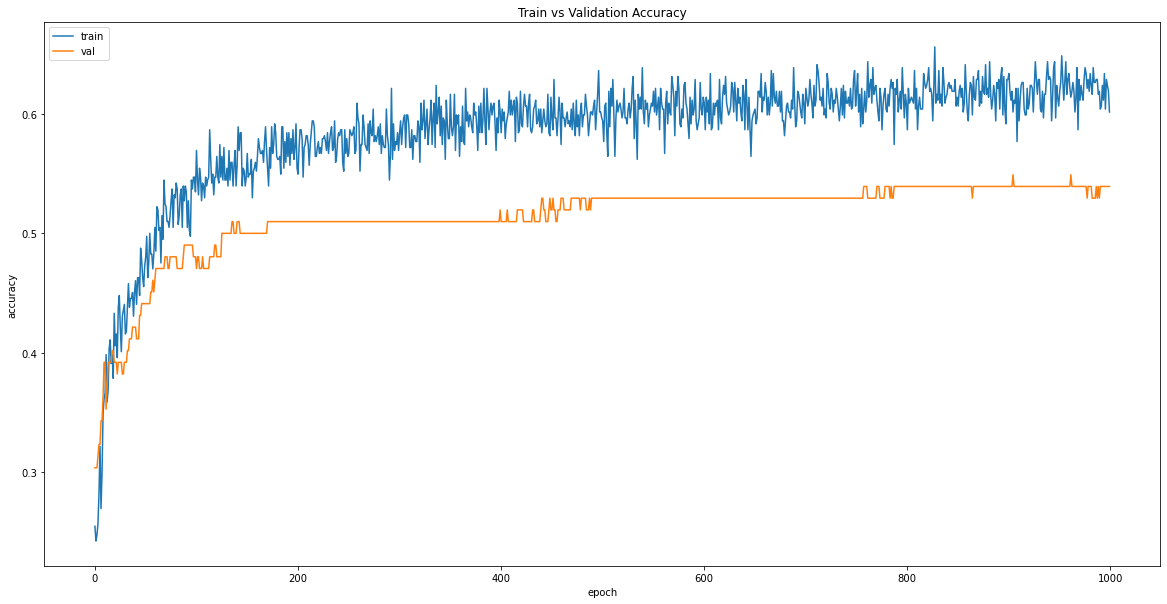

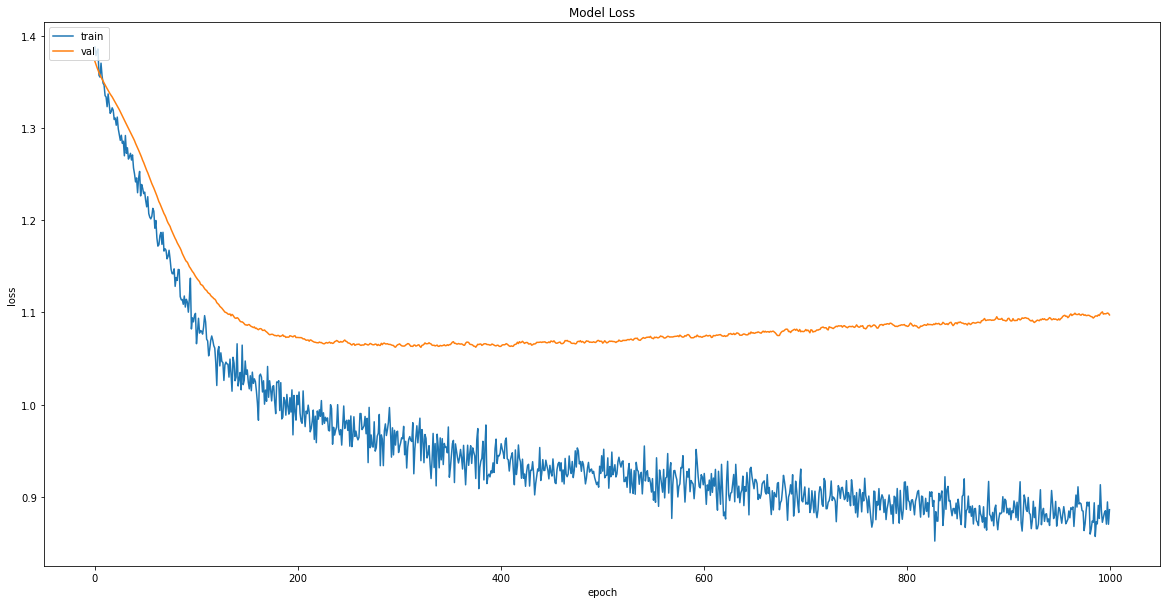

In [14]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['accuracy'])
plt.plot(histories['qn1'].history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
from tensorflow import keras
model = keras.models.load_model('models/qn4.h5')

In [16]:
predictions = model.predict(X_test)

In [17]:
labels = []

for i in predictions:
  labels.append(np.argmax(i))

In [18]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
y_test['predicted'] = labels
y_test['drivers'] = drivers
y_test['constructors'] = constructors
y_test

<ipython-input-18-e66846d9a335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predicted'] = labels
<ipython-input-18-e66846d9a335>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['drivers'] = drivers
<ipython-input-18-e66846d9a335>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,race_class,predicted,drivers,constructors
329,3,2,4.0,1.0
371,0,2,18.0,1.0
219,2,1,817.0,9.0
403,3,3,828.0,15.0
78,1,1,20.0,6.0
15,1,1,1.0,131.0
487,3,3,154.0,210.0
340,2,2,4.0,1.0
310,3,2,815.0,10.0
102,0,2,8.0,6.0


In [19]:
# 0 is DNF
# 1 is podium
# 2 is 4 to 10
# 3 is finished(above 10th place)

In [20]:
predicted = y_test['predicted'].values
actual = y_test['race_class'].values

actual_DNF = 0
correct_DNF = 0
actual_podiums = 0
correct_podiums = 0
actual_pwp = 0
correct_pwp = 0
actual_fin = 0
correct_fin = 0
count = 0
wrong = 0

for i in range(0,len(actual)):
  if actual[i] == 0:
    actual_DNF += 1
  elif actual[i] == 1:
    actual_podiums += 1
  elif actual[i] == 2:
    actual_pwp += 1
  elif actual[i] == 3:
    actual_fin += 1
  
  if actual[i] == 0 and predicted[i]==0:
    correct_DNF += 1
  elif actual[i] == 1 and predicted[i]==1:
    correct_podiums += 1
  elif actual[i] == 2 and predicted[i]==2:
    correct_pwp += 1
  elif actual[i] == 3 and predicted[i]==3:
    correct_fin += 1

  if actual[i] == predicted[i]:
    count += 1

  if actual[i] != predicted[i] and actual[i]!=0:
    wrong += 1

print("percentage correct DNF: " + str((correct_DNF/actual_DNF)*100) + '%')
print("percentage correct podiums: " + str((correct_podiums/actual_podiums)*100) + '%')
print("percentage correct 4th to 10th: " + str((correct_pwp/actual_pwp)*100) + '%')
print("percentage correct finished more than 10th: " + str((correct_fin/actual_fin)*100) + '%')
print("Number of DNFs: " + str(actual_DNF) )
print("percentage of correct predictions: " + str((count/len(actual))*100) + '%')
print("percentage of correct predictions if exclude DNFs: " + str((count/(len(actual)-actual_DNF))*100) + '%')
print("Percentage of DNFs: " + str((actual_DNF/len(actual))*100) + '%')

percentage correct DNF: 0.0%
percentage correct podiums: 72.72727272727273%
percentage correct 4th to 10th: 73.33333333333333%
percentage correct finished more than 10th: 60.0%
Number of DNFs: 20
percentage of correct predictions: 54.90196078431373%
percentage of correct predictions if exclude DNFs: 68.29268292682927%
Percentage of DNFs: 19.607843137254903%


## Question 4 excluding DNF Classification and DNF Data

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(10)

data = pd.read_csv('Data/question4.csv')
data.dropna(inplace=True)
data.head()

,driverId,constructorId,circuitId,Did not finish,Podium,Pos 4 to 10,Accident / Collision,SC,Dry,Wet,pitStop timing (avg),pitStop timing prop(driver),grid,driver_error_rate,constructor_error_rate,circuit_error_rate,race_class
0,1,131,1,0.33,0.33,0.33,0.0,0.67,1.0,0.0,14691.00000,0.073046,1,0.009615,0.073718,0.126246,1
1,1,131,3,0.00,0.67,0.33,0.0,0.33,1.0,0.0,23758.00000,0.073046,1,0.009615,0.073718,0.028571,1
2,1,131,17,0.00,1.00,0.00,0.0,0.33,1.0,0.0,21944.66667,0.073046,22,0.009615,0.073718,0.046358,2
3,1,131,71,0.00,1.00,0.00,0.0,0.50,1.0,0.0,0.00000,0.073046,10,0.009615,0.073718,0.108434,1
4,1,131,4,0.00,0.67,0.00,0.0,0.00,1.0,0.0,21670.66667,0.073046,1,0.009615,0.073718,0.069536,0


In [22]:
data = data[data.race_class != 0]
data.head()

,driverId,constructorId,circuitId,Did not finish,Podium,Pos 4 to 10,Accident / Collision,SC,Dry,Wet,pitStop timing (avg),pitStop timing prop(driver),grid,driver_error_rate,constructor_error_rate,circuit_error_rate,race_class
0,1,131,1,0.33,0.33,0.33,0.0,0.67,1.0,0.0,14691.00000,0.073046,1,0.009615,0.073718,0.126246,1
1,1,131,3,0.00,0.67,0.33,0.0,0.33,1.0,0.0,23758.00000,0.073046,1,0.009615,0.073718,0.028571,1
2,1,131,17,0.00,1.00,0.00,0.0,0.33,1.0,0.0,21944.66667,0.073046,22,0.009615,0.073718,0.046358,2
3,1,131,71,0.00,1.00,0.00,0.0,0.50,1.0,0.0,0.00000,0.073046,10,0.009615,0.073718,0.108434,1
5,1,131,6,0.00,0.67,0.00,0.0,1.00,1.0,0.0,25935.00000,0.073046,3,0.009615,0.073718,0.160535,1


In [23]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1:]

In [24]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns, index=X.index)
X.head()

,driverId,constructorId,circuitId,Did not finish,Podium,Pos 4 to 10,Accident / Collision,SC,Dry,Wet,pitStop timing (avg),pitStop timing prop(driver),grid,driver_error_rate,constructor_error_rate,circuit_error_rate
0,0.0,0.62201,0.000000,0.33,0.33,0.33,0.0,0.67,1.0,0.0,0.500733,1.0,0.000000,0.060666,0.013323,0.749211
1,0.0,0.62201,0.027778,0.00,0.67,0.33,0.0,0.33,1.0,0.0,0.809775,1.0,0.000000,0.060666,0.013323,0.034828
2,0.0,0.62201,0.222222,0.00,1.00,0.00,0.0,0.33,1.0,0.0,0.747969,1.0,1.000000,0.060666,0.013323,0.164915
3,0.0,0.62201,0.972222,0.00,1.00,0.00,0.0,0.50,1.0,0.0,0.000000,1.0,0.428571,0.060666,0.013323,0.618935
5,0.0,0.62201,0.069444,0.00,0.67,0.00,0.0,1.00,1.0,0.0,0.883977,1.0,0.095238,0.060666,0.013323,1.000000


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
print(X_new.shape)
sec = SelectKBest(chi2, k=10).fit(X, y)
selected = sec.get_support()
print("Selected features: ")
features = ['driverId','constructorId','circuitId','Did not finish','Podium','Pos 4 to 10','Accident / Collision','SC','Dry','Wet','pitStop timing (avg)','pitStop timing prop(driver)','start_grid','driver_error_rate','constructor_error_rate','circuit_error_rate']
for i in range(0,len(selected)):
  if(selected[i]==True):
    print(features[i])

(412, 10)
Selected features: 
driverId
constructorId
Did not finish
Podium
Pos 4 to 10
pitStop timing (avg)
pitStop timing prop(driver)
start_grid
driver_error_rate
constructor_error_rate


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
X_test_inverse = min_max_scaler.inverse_transform(X_test)

In [28]:
drivers = []
constructors = []

for i in X_test_inverse:
  drivers.append(i[0])
  constructors.append(i[1])

In [29]:
drivers = np.round(drivers, 0)
constructors = np.round(constructors, 0)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [31]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback

histories = {}

np.random.seed(10)
tf.random.set_seed(10)

# create the model
l2 = tf.keras.regularizers.l2(l2=1e-6)

model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2),
    Dropout(rate=0.2),
    Dense(32, activation='relu', kernel_regularizer=l2),
    Dropout(rate=0.2),
    Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay = 1e-6)

model.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = 'models/qn4_alt.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# train the model
histories['qn1'] =model.fit(X_train, y_train,
                            epochs=1000,
                            verbose = 2,
                            batch_size=4,
                            callbacks = [model_checkpoint_callback],
                            validation_data=(X_test, y_test))

Epoch 1/1000
83/83 - 0s - loss: 1.3380 - accuracy: 0.2796 - val_loss: 1.3249 - val_accuracy: 0.3133
Epoch 2/1000
83/83 - 0s - loss: 1.3072 - accuracy: 0.3435 - val_loss: 1.3060 - val_accuracy: 0.3253
Epoch 3/1000
83/83 - 0s - loss: 1.2875 - accuracy: 0.3465 - val_loss: 1.2878 - val_accuracy: 0.3253
Epoch 4/1000
83/83 - 0s - loss: 1.2808 - accuracy: 0.3465 - val_loss: 1.2711 - val_accuracy: 0.3253
Epoch 5/1000
83/83 - 0s - loss: 1.2531 - accuracy: 0.3708 - val_loss: 1.2545 - val_accuracy: 0.3133
Epoch 6/1000
83/83 - 0s - loss: 1.2400 - accuracy: 0.3465 - val_loss: 1.2393 - val_accuracy: 0.3133
Epoch 7/1000
83/83 - 0s - loss: 1.2241 - accuracy: 0.3556 - val_loss: 1.2254 - val_accuracy: 0.3133
Epoch 8/1000
83/83 - 0s - loss: 1.2200 - accuracy: 0.3739 - val_loss: 1.2118 - val_accuracy: 0.3253
Epoch 9/1000
83/83 - 0s - loss: 1.2073 - accuracy: 0.3830 - val_loss: 1.1990 - val_accuracy: 0.3373
Epoch 10/1000
83/83 - 0s - loss: 1.1866 - accuracy: 0.4438 - val_loss: 1.1865 - val_accuracy: 0.3614

Epoch 83/1000
83/83 - 0s - loss: 0.8226 - accuracy: 0.6413 - val_loss: 0.7229 - val_accuracy: 0.7590
Epoch 84/1000
83/83 - 0s - loss: 0.7987 - accuracy: 0.6231 - val_loss: 0.7191 - val_accuracy: 0.7590
Epoch 85/1000
83/83 - 0s - loss: 0.8053 - accuracy: 0.6353 - val_loss: 0.7156 - val_accuracy: 0.7590
Epoch 86/1000
83/83 - 0s - loss: 0.8026 - accuracy: 0.6565 - val_loss: 0.7118 - val_accuracy: 0.7711
Epoch 87/1000
83/83 - 0s - loss: 0.8098 - accuracy: 0.6049 - val_loss: 0.7086 - val_accuracy: 0.7711
Epoch 88/1000
83/83 - 0s - loss: 0.8261 - accuracy: 0.6231 - val_loss: 0.7063 - val_accuracy: 0.7590
Epoch 89/1000
83/83 - 0s - loss: 0.7919 - accuracy: 0.6657 - val_loss: 0.7034 - val_accuracy: 0.7590
Epoch 90/1000
83/83 - 0s - loss: 0.7915 - accuracy: 0.6413 - val_loss: 0.6995 - val_accuracy: 0.7711
Epoch 91/1000
83/83 - 0s - loss: 0.7824 - accuracy: 0.6413 - val_loss: 0.6957 - val_accuracy: 0.7590
Epoch 92/1000
83/83 - 0s - loss: 0.7901 - accuracy: 0.6717 - val_loss: 0.6932 - val_accurac

Epoch 164/1000
83/83 - 0s - loss: 0.6920 - accuracy: 0.6687 - val_loss: 0.5935 - val_accuracy: 0.7831
Epoch 165/1000
83/83 - 0s - loss: 0.6978 - accuracy: 0.6535 - val_loss: 0.5936 - val_accuracy: 0.7831
Epoch 166/1000
83/83 - 0s - loss: 0.6948 - accuracy: 0.6657 - val_loss: 0.5929 - val_accuracy: 0.7831
Epoch 167/1000
83/83 - 0s - loss: 0.6939 - accuracy: 0.6687 - val_loss: 0.5921 - val_accuracy: 0.7831
Epoch 168/1000
83/83 - 0s - loss: 0.6877 - accuracy: 0.6717 - val_loss: 0.5914 - val_accuracy: 0.7831
Epoch 169/1000
83/83 - 0s - loss: 0.7062 - accuracy: 0.6869 - val_loss: 0.5909 - val_accuracy: 0.7831
Epoch 170/1000
83/83 - 0s - loss: 0.7088 - accuracy: 0.6900 - val_loss: 0.5907 - val_accuracy: 0.7831
Epoch 171/1000
83/83 - 0s - loss: 0.6867 - accuracy: 0.6869 - val_loss: 0.5904 - val_accuracy: 0.7831
Epoch 172/1000
83/83 - 0s - loss: 0.6680 - accuracy: 0.6930 - val_loss: 0.5899 - val_accuracy: 0.7831
Epoch 173/1000
83/83 - 0s - loss: 0.7167 - accuracy: 0.6565 - val_loss: 0.5896 - v

Epoch 245/1000
83/83 - 0s - loss: 0.6476 - accuracy: 0.6991 - val_loss: 0.5714 - val_accuracy: 0.7711
Epoch 246/1000
83/83 - 0s - loss: 0.6541 - accuracy: 0.6778 - val_loss: 0.5714 - val_accuracy: 0.7711
Epoch 247/1000
83/83 - 0s - loss: 0.6399 - accuracy: 0.6930 - val_loss: 0.5710 - val_accuracy: 0.7590
Epoch 248/1000
83/83 - 0s - loss: 0.6644 - accuracy: 0.6930 - val_loss: 0.5712 - val_accuracy: 0.7711
Epoch 249/1000
83/83 - 0s - loss: 0.6623 - accuracy: 0.6687 - val_loss: 0.5715 - val_accuracy: 0.7711
Epoch 250/1000
83/83 - 0s - loss: 0.6527 - accuracy: 0.6778 - val_loss: 0.5714 - val_accuracy: 0.7711
Epoch 251/1000
83/83 - 0s - loss: 0.7202 - accuracy: 0.6474 - val_loss: 0.5716 - val_accuracy: 0.7711
Epoch 252/1000
83/83 - 0s - loss: 0.6576 - accuracy: 0.6930 - val_loss: 0.5711 - val_accuracy: 0.7590
Epoch 253/1000
83/83 - 0s - loss: 0.6533 - accuracy: 0.7021 - val_loss: 0.5710 - val_accuracy: 0.7711
Epoch 254/1000
83/83 - 0s - loss: 0.6499 - accuracy: 0.6809 - val_loss: 0.5704 - v

Epoch 326/1000
83/83 - 0s - loss: 0.6234 - accuracy: 0.7021 - val_loss: 0.5665 - val_accuracy: 0.7711
Epoch 327/1000
83/83 - 0s - loss: 0.6365 - accuracy: 0.6960 - val_loss: 0.5663 - val_accuracy: 0.7831
Epoch 328/1000
83/83 - 0s - loss: 0.6322 - accuracy: 0.6930 - val_loss: 0.5670 - val_accuracy: 0.7711
Epoch 329/1000
83/83 - 0s - loss: 0.6359 - accuracy: 0.7021 - val_loss: 0.5671 - val_accuracy: 0.7711
Epoch 330/1000
83/83 - 0s - loss: 0.6056 - accuracy: 0.7234 - val_loss: 0.5668 - val_accuracy: 0.7831
Epoch 331/1000
83/83 - 0s - loss: 0.6269 - accuracy: 0.6717 - val_loss: 0.5671 - val_accuracy: 0.7711
Epoch 332/1000
83/83 - 0s - loss: 0.6391 - accuracy: 0.6930 - val_loss: 0.5671 - val_accuracy: 0.7711
Epoch 333/1000
83/83 - 0s - loss: 0.6335 - accuracy: 0.6748 - val_loss: 0.5671 - val_accuracy: 0.7711
Epoch 334/1000
83/83 - 0s - loss: 0.6142 - accuracy: 0.7052 - val_loss: 0.5670 - val_accuracy: 0.7711
Epoch 335/1000
83/83 - 0s - loss: 0.6290 - accuracy: 0.7143 - val_loss: 0.5669 - v

Epoch 407/1000
83/83 - 0s - loss: 0.6024 - accuracy: 0.7021 - val_loss: 0.5614 - val_accuracy: 0.7590
Epoch 408/1000
83/83 - 0s - loss: 0.5875 - accuracy: 0.7234 - val_loss: 0.5615 - val_accuracy: 0.7590
Epoch 409/1000
83/83 - 0s - loss: 0.6235 - accuracy: 0.6960 - val_loss: 0.5620 - val_accuracy: 0.7711
Epoch 410/1000
83/83 - 0s - loss: 0.5860 - accuracy: 0.7204 - val_loss: 0.5619 - val_accuracy: 0.7831
Epoch 411/1000
83/83 - 0s - loss: 0.6148 - accuracy: 0.6900 - val_loss: 0.5617 - val_accuracy: 0.7590
Epoch 412/1000
83/83 - 0s - loss: 0.5969 - accuracy: 0.6991 - val_loss: 0.5615 - val_accuracy: 0.7590
Epoch 413/1000
83/83 - 0s - loss: 0.6121 - accuracy: 0.6991 - val_loss: 0.5614 - val_accuracy: 0.7590
Epoch 414/1000
83/83 - 0s - loss: 0.6064 - accuracy: 0.7021 - val_loss: 0.5615 - val_accuracy: 0.7590
Epoch 415/1000
83/83 - 0s - loss: 0.5930 - accuracy: 0.7082 - val_loss: 0.5616 - val_accuracy: 0.7831
Epoch 416/1000
83/83 - 0s - loss: 0.6183 - accuracy: 0.6930 - val_loss: 0.5622 - v

Epoch 488/1000
83/83 - 0s - loss: 0.6089 - accuracy: 0.7082 - val_loss: 0.5655 - val_accuracy: 0.7711
Epoch 489/1000
83/83 - 0s - loss: 0.5922 - accuracy: 0.7082 - val_loss: 0.5643 - val_accuracy: 0.7711
Epoch 490/1000
83/83 - 0s - loss: 0.5934 - accuracy: 0.7021 - val_loss: 0.5638 - val_accuracy: 0.7831
Epoch 491/1000
83/83 - 0s - loss: 0.6157 - accuracy: 0.7052 - val_loss: 0.5635 - val_accuracy: 0.7831
Epoch 492/1000
83/83 - 0s - loss: 0.6212 - accuracy: 0.6960 - val_loss: 0.5638 - val_accuracy: 0.7831
Epoch 493/1000
83/83 - 0s - loss: 0.6192 - accuracy: 0.7021 - val_loss: 0.5637 - val_accuracy: 0.7711
Epoch 494/1000
83/83 - 0s - loss: 0.6085 - accuracy: 0.6930 - val_loss: 0.5634 - val_accuracy: 0.7711
Epoch 495/1000
83/83 - 0s - loss: 0.6044 - accuracy: 0.7173 - val_loss: 0.5631 - val_accuracy: 0.7831
Epoch 496/1000
83/83 - 0s - loss: 0.5882 - accuracy: 0.6930 - val_loss: 0.5630 - val_accuracy: 0.7831
Epoch 497/1000
83/83 - 0s - loss: 0.6133 - accuracy: 0.6930 - val_loss: 0.5638 - v

Epoch 569/1000
83/83 - 0s - loss: 0.5774 - accuracy: 0.7052 - val_loss: 0.5658 - val_accuracy: 0.7590
Epoch 570/1000
83/83 - 0s - loss: 0.5968 - accuracy: 0.7356 - val_loss: 0.5651 - val_accuracy: 0.7590
Epoch 571/1000
83/83 - 0s - loss: 0.6086 - accuracy: 0.7264 - val_loss: 0.5647 - val_accuracy: 0.7590
Epoch 572/1000
83/83 - 0s - loss: 0.5732 - accuracy: 0.7234 - val_loss: 0.5642 - val_accuracy: 0.7590
Epoch 573/1000
83/83 - 0s - loss: 0.6239 - accuracy: 0.6717 - val_loss: 0.5656 - val_accuracy: 0.7590
Epoch 574/1000
83/83 - 0s - loss: 0.6062 - accuracy: 0.7082 - val_loss: 0.5657 - val_accuracy: 0.7590
Epoch 575/1000
83/83 - 0s - loss: 0.5684 - accuracy: 0.7082 - val_loss: 0.5659 - val_accuracy: 0.7590
Epoch 576/1000
83/83 - 0s - loss: 0.6137 - accuracy: 0.6900 - val_loss: 0.5661 - val_accuracy: 0.7590
Epoch 577/1000
83/83 - 0s - loss: 0.6090 - accuracy: 0.6900 - val_loss: 0.5662 - val_accuracy: 0.7590
Epoch 578/1000
83/83 - 0s - loss: 0.5867 - accuracy: 0.7021 - val_loss: 0.5657 - v

Epoch 650/1000
83/83 - 0s - loss: 0.5881 - accuracy: 0.7143 - val_loss: 0.5642 - val_accuracy: 0.7590
Epoch 651/1000
83/83 - 0s - loss: 0.5907 - accuracy: 0.6839 - val_loss: 0.5641 - val_accuracy: 0.7590
Epoch 652/1000
83/83 - 0s - loss: 0.5879 - accuracy: 0.7264 - val_loss: 0.5642 - val_accuracy: 0.7590
Epoch 653/1000
83/83 - 0s - loss: 0.5943 - accuracy: 0.7204 - val_loss: 0.5648 - val_accuracy: 0.7711
Epoch 654/1000
83/83 - 0s - loss: 0.5851 - accuracy: 0.7021 - val_loss: 0.5646 - val_accuracy: 0.7711
Epoch 655/1000
83/83 - 0s - loss: 0.6083 - accuracy: 0.7173 - val_loss: 0.5641 - val_accuracy: 0.7590
Epoch 656/1000
83/83 - 0s - loss: 0.5645 - accuracy: 0.7295 - val_loss: 0.5644 - val_accuracy: 0.7590
Epoch 657/1000
83/83 - 0s - loss: 0.5956 - accuracy: 0.7021 - val_loss: 0.5638 - val_accuracy: 0.7590
Epoch 658/1000
83/83 - 0s - loss: 0.5677 - accuracy: 0.7508 - val_loss: 0.5638 - val_accuracy: 0.7590
Epoch 659/1000
83/83 - 0s - loss: 0.6033 - accuracy: 0.7082 - val_loss: 0.5641 - v

Epoch 731/1000
83/83 - 0s - loss: 0.5999 - accuracy: 0.7021 - val_loss: 0.5664 - val_accuracy: 0.7711
Epoch 732/1000
83/83 - 0s - loss: 0.5838 - accuracy: 0.7021 - val_loss: 0.5661 - val_accuracy: 0.7349
Epoch 733/1000
83/83 - 0s - loss: 0.5828 - accuracy: 0.7508 - val_loss: 0.5664 - val_accuracy: 0.7349
Epoch 734/1000
83/83 - 0s - loss: 0.5656 - accuracy: 0.7173 - val_loss: 0.5662 - val_accuracy: 0.7349
Epoch 735/1000
83/83 - 0s - loss: 0.5650 - accuracy: 0.7112 - val_loss: 0.5662 - val_accuracy: 0.7470
Epoch 736/1000
83/83 - 0s - loss: 0.5863 - accuracy: 0.7082 - val_loss: 0.5663 - val_accuracy: 0.7470
Epoch 737/1000
83/83 - 0s - loss: 0.5654 - accuracy: 0.7204 - val_loss: 0.5663 - val_accuracy: 0.7470
Epoch 738/1000
83/83 - 0s - loss: 0.5993 - accuracy: 0.6900 - val_loss: 0.5665 - val_accuracy: 0.7590
Epoch 739/1000
83/83 - 0s - loss: 0.5625 - accuracy: 0.7234 - val_loss: 0.5656 - val_accuracy: 0.7590
Epoch 740/1000
83/83 - 0s - loss: 0.5726 - accuracy: 0.7082 - val_loss: 0.5662 - v

Epoch 812/1000
83/83 - 0s - loss: 0.6057 - accuracy: 0.6869 - val_loss: 0.5636 - val_accuracy: 0.7590
Epoch 813/1000
83/83 - 0s - loss: 0.5918 - accuracy: 0.7082 - val_loss: 0.5636 - val_accuracy: 0.7590
Epoch 814/1000
83/83 - 0s - loss: 0.5836 - accuracy: 0.6930 - val_loss: 0.5634 - val_accuracy: 0.7711
Epoch 815/1000
83/83 - 0s - loss: 0.5747 - accuracy: 0.7052 - val_loss: 0.5634 - val_accuracy: 0.7711
Epoch 816/1000
83/83 - 0s - loss: 0.5900 - accuracy: 0.6900 - val_loss: 0.5640 - val_accuracy: 0.7711
Epoch 817/1000
83/83 - 0s - loss: 0.5596 - accuracy: 0.7143 - val_loss: 0.5634 - val_accuracy: 0.7711
Epoch 818/1000
83/83 - 0s - loss: 0.5899 - accuracy: 0.7112 - val_loss: 0.5637 - val_accuracy: 0.7711
Epoch 819/1000
83/83 - 0s - loss: 0.5860 - accuracy: 0.7052 - val_loss: 0.5637 - val_accuracy: 0.7711
Epoch 820/1000
83/83 - 0s - loss: 0.5860 - accuracy: 0.7143 - val_loss: 0.5635 - val_accuracy: 0.7711
Epoch 821/1000
83/83 - 0s - loss: 0.5678 - accuracy: 0.7264 - val_loss: 0.5637 - v

Epoch 893/1000
83/83 - 0s - loss: 0.5804 - accuracy: 0.7052 - val_loss: 0.5658 - val_accuracy: 0.7470
Epoch 894/1000
83/83 - 0s - loss: 0.5929 - accuracy: 0.7173 - val_loss: 0.5664 - val_accuracy: 0.7470
Epoch 895/1000
83/83 - 0s - loss: 0.5867 - accuracy: 0.7234 - val_loss: 0.5663 - val_accuracy: 0.7470
Epoch 896/1000
83/83 - 0s - loss: 0.5830 - accuracy: 0.7021 - val_loss: 0.5663 - val_accuracy: 0.7470
Epoch 897/1000
83/83 - 0s - loss: 0.5787 - accuracy: 0.6991 - val_loss: 0.5658 - val_accuracy: 0.7470
Epoch 898/1000
83/83 - 0s - loss: 0.5870 - accuracy: 0.6869 - val_loss: 0.5657 - val_accuracy: 0.7470
Epoch 899/1000
83/83 - 0s - loss: 0.5722 - accuracy: 0.7052 - val_loss: 0.5656 - val_accuracy: 0.7590
Epoch 900/1000
83/83 - 0s - loss: 0.5746 - accuracy: 0.6960 - val_loss: 0.5655 - val_accuracy: 0.7470
Epoch 901/1000
83/83 - 0s - loss: 0.5864 - accuracy: 0.7052 - val_loss: 0.5651 - val_accuracy: 0.7470
Epoch 902/1000
83/83 - 0s - loss: 0.5722 - accuracy: 0.6991 - val_loss: 0.5657 - v

Epoch 974/1000
83/83 - 0s - loss: 0.5701 - accuracy: 0.7295 - val_loss: 0.5645 - val_accuracy: 0.7470
Epoch 975/1000
83/83 - 0s - loss: 0.5919 - accuracy: 0.7082 - val_loss: 0.5642 - val_accuracy: 0.7470
Epoch 976/1000
83/83 - 0s - loss: 0.5641 - accuracy: 0.7082 - val_loss: 0.5639 - val_accuracy: 0.7470
Epoch 977/1000
83/83 - 0s - loss: 0.5933 - accuracy: 0.7052 - val_loss: 0.5637 - val_accuracy: 0.7470
Epoch 978/1000
83/83 - 0s - loss: 0.5592 - accuracy: 0.7325 - val_loss: 0.5636 - val_accuracy: 0.7470
Epoch 979/1000
83/83 - 0s - loss: 0.5734 - accuracy: 0.7173 - val_loss: 0.5637 - val_accuracy: 0.7349
Epoch 980/1000
83/83 - 0s - loss: 0.5979 - accuracy: 0.7112 - val_loss: 0.5639 - val_accuracy: 0.7470
Epoch 981/1000
83/83 - 0s - loss: 0.5484 - accuracy: 0.7052 - val_loss: 0.5635 - val_accuracy: 0.7590
Epoch 982/1000
83/83 - 0s - loss: 0.5522 - accuracy: 0.7143 - val_loss: 0.5642 - val_accuracy: 0.7470
Epoch 983/1000
83/83 - 0s - loss: 0.5758 - accuracy: 0.7052 - val_loss: 0.5642 - v

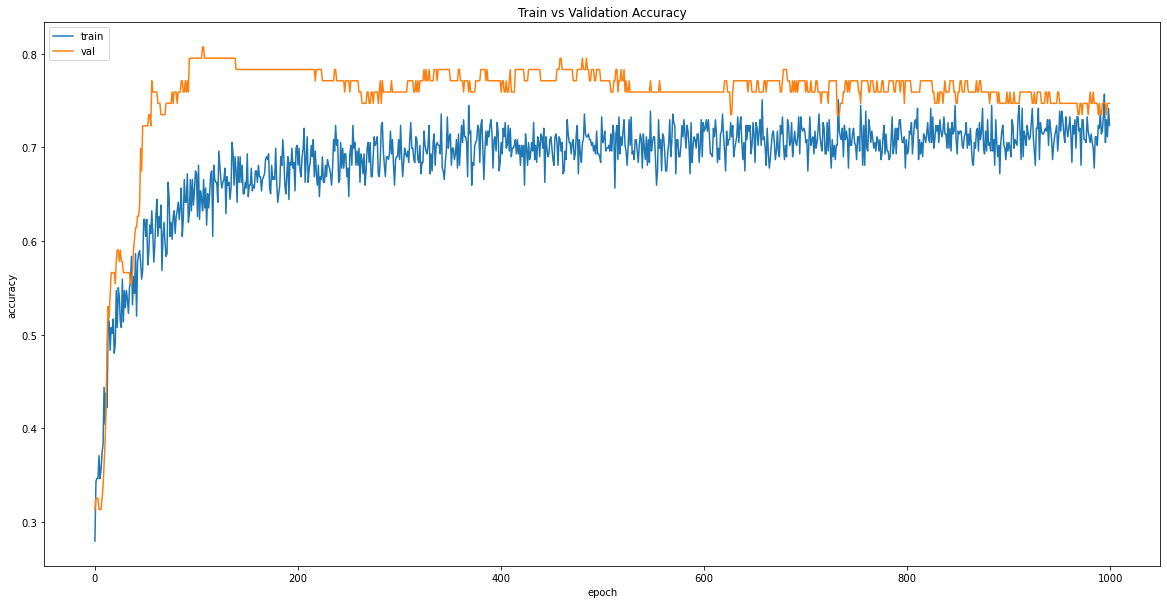

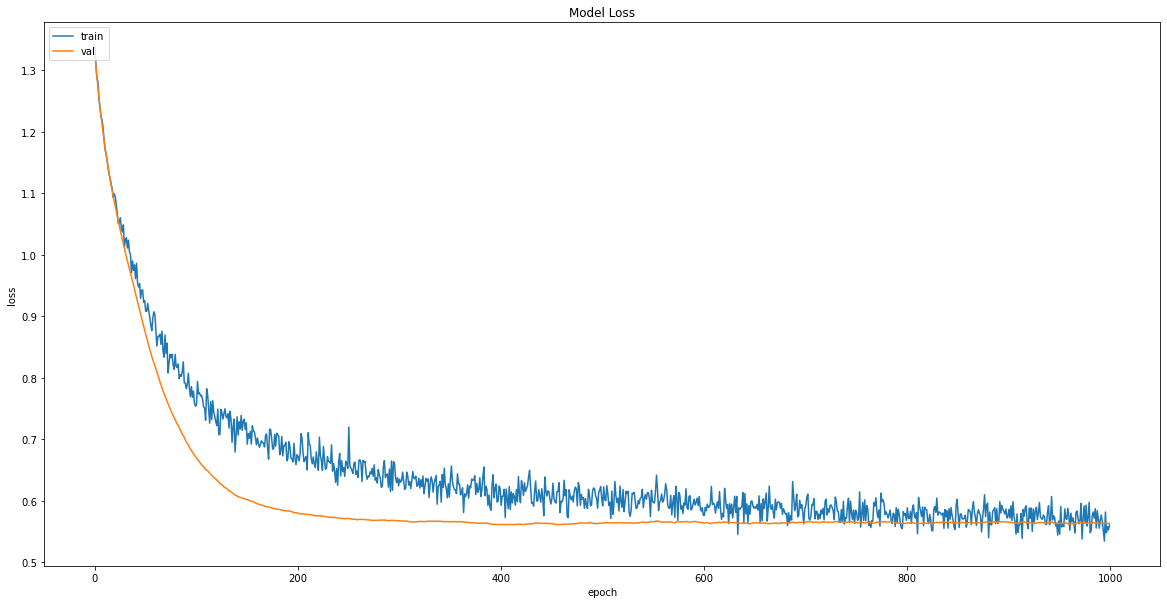

In [32]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['accuracy'])
plt.plot(histories['qn1'].history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
from tensorflow import keras
model = keras.models.load_model('models/qn4_alt.hdf5')

In [34]:
predictions = model.predict(X_test)

In [35]:
labels = []

for i in predictions:
  labels.append(np.argmax(i))

In [36]:
drivers = np.round(drivers, 0)
constructors = np.round(constructors, 0)

In [37]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
y_test['predicted'] = labels
y_test['drivers'] = drivers
y_test['constructors'] = constructors
y_test

<ipython-input-37-e66846d9a335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predicted'] = labels
<ipython-input-37-e66846d9a335>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['drivers'] = drivers
<ipython-input-37-e66846d9a335>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,race_class,predicted,drivers,constructors
461,3,3,837.0,209.0
193,2,2,13.0,3.0
265,3,3,826.0,5.0
399,3,3,828.0,15.0
408,3,3,828.0,15.0
487,3,3,154.0,210.0
170,2,2,822.0,131.0
11,1,1,1.0,131.0
23,1,1,1.0,131.0
301,2,2,815.0,10.0


In [38]:
predicted = y_test['predicted'].values
actual = y_test['race_class'].values

actual_DNF = 0
correct_DNF = 0
actual_podiums = 0
correct_podiums = 0
actual_pwp = 0
correct_pwp = 0
actual_fin = 0
correct_fin = 0
count = 0
wrong = 0

for i in range(0,len(actual)):
  if actual[i] == 0:
    actual_DNF += 1
  elif actual[i] == 1:
    actual_podiums += 1
  elif actual[i] == 2:
    actual_pwp += 1
  elif actual[i] == 3:
    actual_fin += 1
  
  if actual[i] == 0 and predicted[i]==0:
    correct_DNF += 1
  elif actual[i] == 1 and predicted[i]==1:
    correct_podiums += 1
  elif actual[i] == 2 and predicted[i]==2:
    correct_pwp += 1
  elif actual[i] == 3 and predicted[i]==3:
    correct_fin += 1

  if actual[i] == predicted[i]:
    count += 1

  if actual[i] != predicted[i] and actual[i]!=0:
    wrong += 1

print("percentage correct podiums: " + str((correct_podiums/actual_podiums)*100) + '%')
print("percentage correct 4th to 10th: " + str((correct_pwp/actual_pwp)*100) + '%')
print("percentage correct finished more than 10th: " + str((correct_fin/actual_fin)*100) + '%')
print("percentage of correct predictions: " + str((count/len(actual))*100) + '%')

percentage correct podiums: 80.76923076923077%
percentage correct 4th to 10th: 74.19354838709677%
percentage correct finished more than 10th: 88.46153846153845%
percentage of correct predictions: 80.72289156626506%
